## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [12]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [13]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [14]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    v = keras.layers.Dense(units=1024, activation='relu')(input_layer)
    w = keras.layers.Dense(units=512, activation='relu')(v)
    x = keras.layers.Dense(units=256, activation='relu')(w)
    y = keras.layers.Dense(units=128, activation='relu')(x)
    z = keras.layers.Dense(units=64, activation='relu')(y)
    output = keras.layers.Dense(units=10, activation='softmax')(z)
    model = keras.models.Model(inputs=[input_layer], outputs=[output])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total para

In [16]:
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.8, decay=0.1)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0826 00:13:37.840346 4553807296 deprecation.py:323] From /Users/bobchien/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0826 00:13:37.924827 4553807296 deprecation_wrapper.py:119] From /Users/bobchien/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 269us/step - loss: 2.0380 - acc: 0.2772 - val_loss: 1.9295 - val_acc: 0.3133
Epoch 2/500
50000/50000 [==============================] - 14s 282us/step - loss: 1.8997 - acc: 0.3285 - val_loss: 1.8782 - val_acc: 0.3383
Epoch 3/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.8664 - acc: 0.3403 - val_loss: 1.8583 - val_acc: 0.3409
Epoch 4/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.8484 - acc: 0.3459 - val_loss: 1.8424 - val_acc: 0.3482
Epoch 5/500
50000/50000 [==============================] - 10s 204us/step - loss: 1.8358 - acc: 0.3509 - val_loss: 1.8321 - val_acc: 0.3549
Epoch 6/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.8265 - acc: 0.3558 - val_loss: 1.8255 - val_acc: 0.3535
Epoch 7/500
50000/50000 [==============================] - 10s 210us/step - loss: 1.8193 - acc: 0.3573 - val_l

50000/50000 [==============================] - 14s 270us/step - loss: 1.7412 - acc: 0.3843 - val_loss: 1.7437 - val_acc: 0.3876
Epoch 59/500
50000/50000 [==============================] - 14s 270us/step - loss: 1.7406 - acc: 0.3848 - val_loss: 1.7432 - val_acc: 0.3866
Epoch 60/500
50000/50000 [==============================] - 14s 283us/step - loss: 1.7401 - acc: 0.3850 - val_loss: 1.7427 - val_acc: 0.3868
Epoch 61/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.7396 - acc: 0.3853 - val_loss: 1.7424 - val_acc: 0.3859
Epoch 62/500
50000/50000 [==============================] - 13s 270us/step - loss: 1.7391 - acc: 0.3851 - val_loss: 1.7417 - val_acc: 0.3871
Epoch 63/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.7386 - acc: 0.3853 - val_loss: 1.7413 - val_acc: 0.3866
Epoch 64/500
50000/50000 [==============================] - 13s 270us/step - loss: 1.7381 - acc: 0.3857 - val_loss: 1.7408 - val_acc: 0.3877
Epoch 65/500
50000/50000 [

50000/50000 [==============================] - 15s 292us/step - loss: 1.7204 - acc: 0.3922 - val_loss: 1.7233 - val_acc: 0.3929
Epoch 117/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.7201 - acc: 0.3932 - val_loss: 1.7230 - val_acc: 0.3924
Epoch 118/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.7199 - acc: 0.3925 - val_loss: 1.7228 - val_acc: 0.3931
Epoch 119/500
50000/50000 [==============================] - 15s 293us/step - loss: 1.7197 - acc: 0.3928 - val_loss: 1.7226 - val_acc: 0.3926
Epoch 120/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.7194 - acc: 0.3928 - val_loss: 1.7223 - val_acc: 0.3931
Epoch 121/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.7192 - acc: 0.3928 - val_loss: 1.7221 - val_acc: 0.3930
Epoch 122/500
50000/50000 [==============================] - 15s 292us/step - loss: 1.7189 - acc: 0.3928 - val_loss: 1.7218 - val_acc: 0.3938
Epoch 123/500
50000/

50000/50000 [==============================] - 21s 423us/step - loss: 1.7091 - acc: 0.3971 - val_loss: 1.7123 - val_acc: 0.3973
Epoch 174/500
50000/50000 [==============================] - 19s 390us/step - loss: 1.7090 - acc: 0.3970 - val_loss: 1.7121 - val_acc: 0.3974
Epoch 175/500
50000/50000 [==============================] - 20s 408us/step - loss: 1.7088 - acc: 0.3969 - val_loss: 1.7119 - val_acc: 0.3971
Epoch 176/500
50000/50000 [==============================] - 18s 358us/step - loss: 1.7087 - acc: 0.3969 - val_loss: 1.7118 - val_acc: 0.3976
Epoch 177/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.7085 - acc: 0.3971 - val_loss: 1.7116 - val_acc: 0.3978
Epoch 178/500
50000/50000 [==============================] - 16s 315us/step - loss: 1.7084 - acc: 0.3972 - val_loss: 1.7115 - val_acc: 0.3978
Epoch 179/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.7082 - acc: 0.3972 - val_loss: 1.7113 - val_acc: 0.3974
Epoch 180/500
50000/

Epoch 231/500
50000/50000 [==============================] - 15s 299us/step - loss: 1.7012 - acc: 0.4002 - val_loss: 1.7045 - val_acc: 0.4015
Epoch 232/500
50000/50000 [==============================] - 15s 300us/step - loss: 1.7011 - acc: 0.4005 - val_loss: 1.7043 - val_acc: 0.4019
Epoch 233/500
50000/50000 [==============================] - 15s 300us/step - loss: 1.7010 - acc: 0.4003 - val_loss: 1.7043 - val_acc: 0.4014
Epoch 234/500
50000/50000 [==============================] - 15s 298us/step - loss: 1.7009 - acc: 0.4006 - val_loss: 1.7041 - val_acc: 0.4019
Epoch 235/500
50000/50000 [==============================] - 15s 297us/step - loss: 1.7008 - acc: 0.4002 - val_loss: 1.7040 - val_acc: 0.4017
Epoch 236/500
50000/50000 [==============================] - 15s 299us/step - loss: 1.7007 - acc: 0.4002 - val_loss: 1.7039 - val_acc: 0.4016
Epoch 237/500
50000/50000 [==============================] - 15s 298us/step - loss: 1.7006 - acc: 0.4002 - val_loss: 1.7038 - val_acc: 0.4019
Epoch 

Epoch 289/500
50000/50000 [==============================] - 14s 289us/step - loss: 1.6953 - acc: 0.4016 - val_loss: 1.6987 - val_acc: 0.4029
Epoch 290/500
50000/50000 [==============================] - 15s 292us/step - loss: 1.6952 - acc: 0.4018 - val_loss: 1.6986 - val_acc: 0.4029
Epoch 291/500
50000/50000 [==============================] - 14s 289us/step - loss: 1.6951 - acc: 0.4018 - val_loss: 1.6985 - val_acc: 0.4030
Epoch 292/500
50000/50000 [==============================] - 15s 294us/step - loss: 1.6950 - acc: 0.4020 - val_loss: 1.6985 - val_acc: 0.4032
Epoch 293/500
50000/50000 [==============================] - 15s 291us/step - loss: 1.6950 - acc: 0.4018 - val_loss: 1.6984 - val_acc: 0.4031
Epoch 294/500
50000/50000 [==============================] - 15s 290us/step - loss: 1.6949 - acc: 0.4018 - val_loss: 1.6983 - val_acc: 0.4033
Epoch 295/500
50000/50000 [==============================] - 17s 335us/step - loss: 1.6948 - acc: 0.4018 - val_loss: 1.6982 - val_acc: 0.4032
Epoch 

50000/50000 [==============================] - 15s 310us/step - loss: 1.6906 - acc: 0.4035 - val_loss: 1.6942 - val_acc: 0.4040
Epoch 347/500
50000/50000 [==============================] - 15s 309us/step - loss: 1.6906 - acc: 0.4032 - val_loss: 1.6941 - val_acc: 0.4039
Epoch 348/500
50000/50000 [==============================] - 16s 313us/step - loss: 1.6905 - acc: 0.4031 - val_loss: 1.6940 - val_acc: 0.4046
Epoch 349/500
50000/50000 [==============================] - 16s 313us/step - loss: 1.6904 - acc: 0.4032 - val_loss: 1.6940 - val_acc: 0.4042
Epoch 350/500
50000/50000 [==============================] - 16s 317us/step - loss: 1.6904 - acc: 0.4035 - val_loss: 1.6939 - val_acc: 0.4041
Epoch 351/500
50000/50000 [==============================] - 16s 311us/step - loss: 1.6903 - acc: 0.4035 - val_loss: 1.6939 - val_acc: 0.4047
Epoch 352/500
50000/50000 [==============================] - 16s 318us/step - loss: 1.6902 - acc: 0.4035 - val_loss: 1.6938 - val_acc: 0.4045
Epoch 353/500
50000/

50000/50000 [==============================] - 14s 284us/step - loss: 1.6868 - acc: 0.4050 - val_loss: 1.6905 - val_acc: 0.4047
Epoch 404/500
50000/50000 [==============================] - 14s 283us/step - loss: 1.6867 - acc: 0.4048 - val_loss: 1.6904 - val_acc: 0.4048
Epoch 405/500
50000/50000 [==============================] - 14s 283us/step - loss: 1.6866 - acc: 0.4051 - val_loss: 1.6903 - val_acc: 0.4048
Epoch 406/500
50000/50000 [==============================] - 14s 284us/step - loss: 1.6866 - acc: 0.4052 - val_loss: 1.6903 - val_acc: 0.4049
Epoch 407/500
50000/50000 [==============================] - 16s 314us/step - loss: 1.6865 - acc: 0.4050 - val_loss: 1.6902 - val_acc: 0.4048
Epoch 408/500
50000/50000 [==============================] - 16s 320us/step - loss: 1.6864 - acc: 0.4053 - val_loss: 1.6902 - val_acc: 0.4048
Epoch 409/500
50000/50000 [==============================] - 16s 323us/step - loss: 1.6864 - acc: 0.4052 - val_loss: 1.6901 - val_acc: 0.4047
Epoch 410/500
50000/

Epoch 461/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.6834 - acc: 0.4058 - val_loss: 1.6872 - val_acc: 0.4061
Epoch 462/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.6833 - acc: 0.4060 - val_loss: 1.6872 - val_acc: 0.4061
Epoch 463/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.6833 - acc: 0.4060 - val_loss: 1.6871 - val_acc: 0.4061
Epoch 464/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.6832 - acc: 0.4060 - val_loss: 1.6871 - val_acc: 0.4059
Epoch 465/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.6832 - acc: 0.4062 - val_loss: 1.6871 - val_acc: 0.4064
Epoch 466/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.6831 - acc: 0.4062 - val_loss: 1.6870 - val_acc: 0.4063
Epoch 467/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.6830 - acc: 0.4062 - val_loss: 1.6869 - val_acc: 0.4062
Epoch 

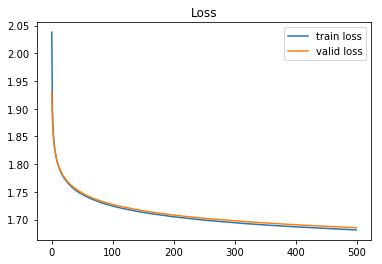

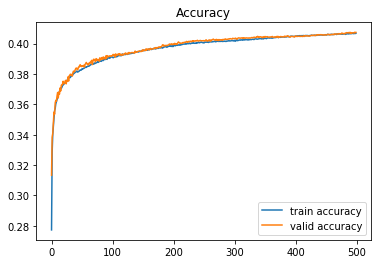

In [19]:
import matplotlib.pyplot as plt
# 以視覺化方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()